In [129]:
import numpy as np
import zarr
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd

In [186]:
data = zarr.load("./data/mimicry_2024-06-15_23-36-01.zarr/")

In [187]:
s = data['s']
v = data['v']
d = data['d']
r = data['r']

In [188]:
s_weighted = []
d_mean = []
s_mimic = []
for t in range(len(s)):
    s_t = s[t]
    d_t = d[t]
    v_t = v[t]
    s_weighted += [(s_t[:100].T * v_t).sum(1) / v_t.sum()]
    d_mean += [d_t.mean(0)]
s_weighted = np.array(s_weighted)
d_mean = np.array(d_mean)

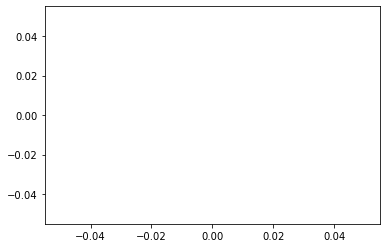

In [189]:
# Correlation between mimic and s_weighted over time
y_2 = []
for i in range(len(s_mimic)):
    a = d_mean[i]
    b = s_weighted[i]
    v_sim = np.dot(a, b)
    y_2.append(v_sim)

plt.plot(range(len(s_mimic)), y_2)

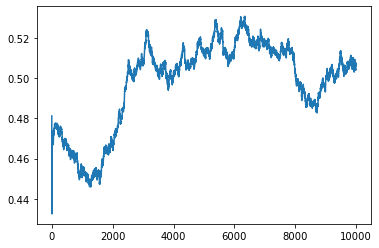

In [194]:
plt.plot(range(1, 10001), v.mean(1))
# plt.xscale('log')

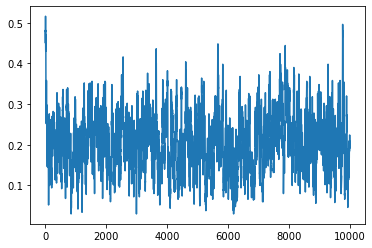

In [191]:
plt.plot(range(1, 10000), abs(s[1:] - s[:-1]).mean((2,1)))